## Part II - Propser Loan Data
##  By Muluneh

## Investigation Overview


I focused on key features that will answer the questions for my investigation. I started by showing the amount of loan loaned out and to find out if the Borrower Rate, Prosper rating and APR rate has effect on the amount of loan borrowed. Also I checked the correlation between different features


## Dataset Overview

This dataset contains loan information of about 113,937 rows with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

I am looking forward to investigate the following questions

- What factors affect a loan’s outcome status?
- What affects the borrower’s APR or interest rate?
- Are there differences between loans depending on how large the original loan amount was?

In [1]:
#import all packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# Load the dataset
df_lone = pd.read_csv('prosperLoanData.csv')
# choose some columns from the dataset which is interested for the analysis
column_list = ['Term','LoanStatus','BorrowerAPR','LenderYield','EstimatedLoss','ProsperRating (Alpha)',
               'BorrowerState','Occupation','EmploymentStatus','DebtToIncomeRatio','IncomeRange',
               'StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment','PercentFunded']

df_new = df_lone[column_list]

### LoanOriginalAmount Vs MonthlyLoanPayme

> The correlation between LoanOriginalAmount and MonthlyLoanPayment is positive with some outliears.


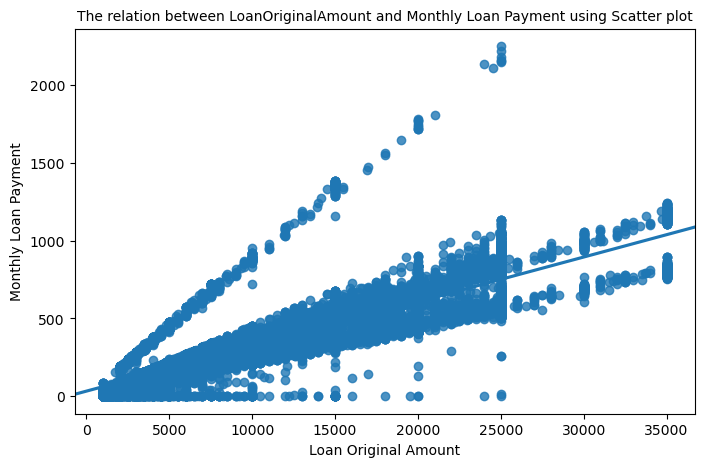

In [2]:
# Scatter plot for the quantitative variables.
plt.figure(figsize=[8,5])
sns.regplot(data= df_new,x='LoanOriginalAmount',y='MonthlyLoanPayment',truncate=False,x_jitter=0.5)
plt.xlabel('Loan Original Amount')
plt.ylabel('Monthly Loan Payment')
plt.title('The relation between LoanOriginalAmount and Monthly Loan Payment using Scatter plot',fontsize=10);

### LoanOriginalAmount Vs BorrowerAPR
> As we can see from the lone original amout and borrower APR relation the more darkesst place is on the region  0.35 to 0.40 

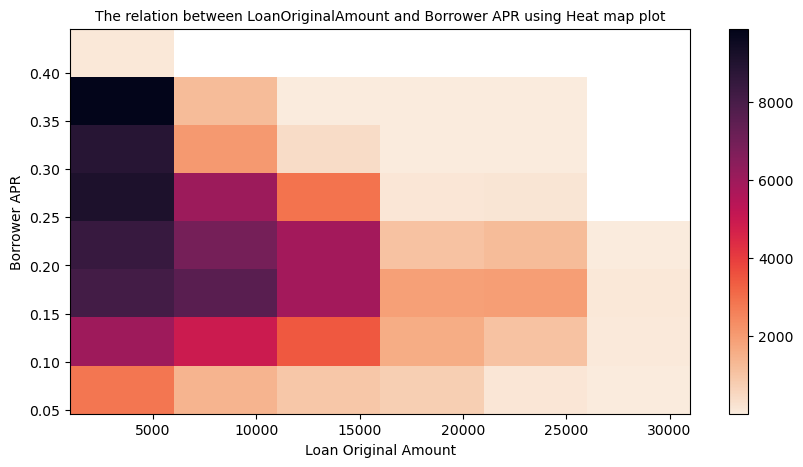

In [3]:
# Heatmap plot
bins_x= np.arange(1000,35000+1000,5000)
bins_y= np.arange(0.046,0.423+0.05,0.05)
plt.figure(figsize=[10,5])
plt.hist2d(data=df_new,y= 'BorrowerAPR', x= 'LoanOriginalAmount',cmin=0.5, cmap='rocket_r',bins = [bins_x, bins_y])
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR')
plt.colorbar()
plt.title('The relation between LoanOriginalAmount and Borrower APR using Heat map plot',fontsize=10);

## MonthlyLoanPayment Vs Borrower Rate
> As can be seen, the monthly loan payment has a negative association with the borrower's rate, which means that as the monthly loan payment rises, the borrower's rate decreases. As a result, borrowers who make large monthly loan payments pay less interest, which, in my opinion, is a marketing ploy that enables borrowers who make large monthly payments to take out larger loans.

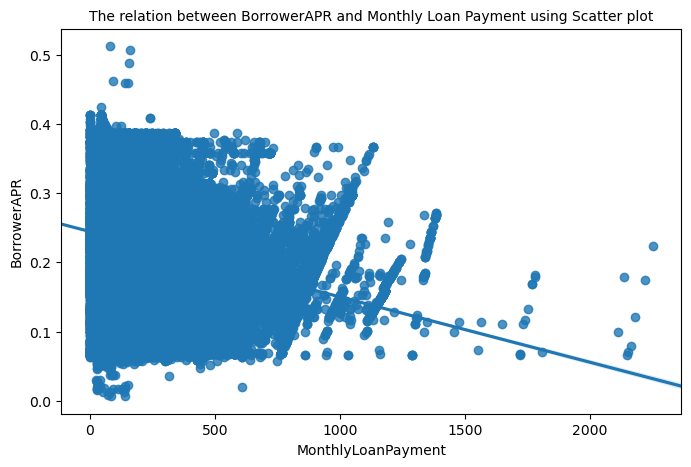

In [4]:
# Scatter plot for the quantitative variables.
plt.figure(figsize=[8,5])
sns.regplot(data= df_new,y='BorrowerAPR',x='MonthlyLoanPayment',truncate=False,x_jitter=0.5)
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('BorrowerAPR')
plt.title('The relation between BorrowerAPR and Monthly Loan Payment using Scatter plot',fontsize=10);

## LoanStatus Vs Borrower Rate
> Most of the loan staus is current with median around 0.22 borrower rate

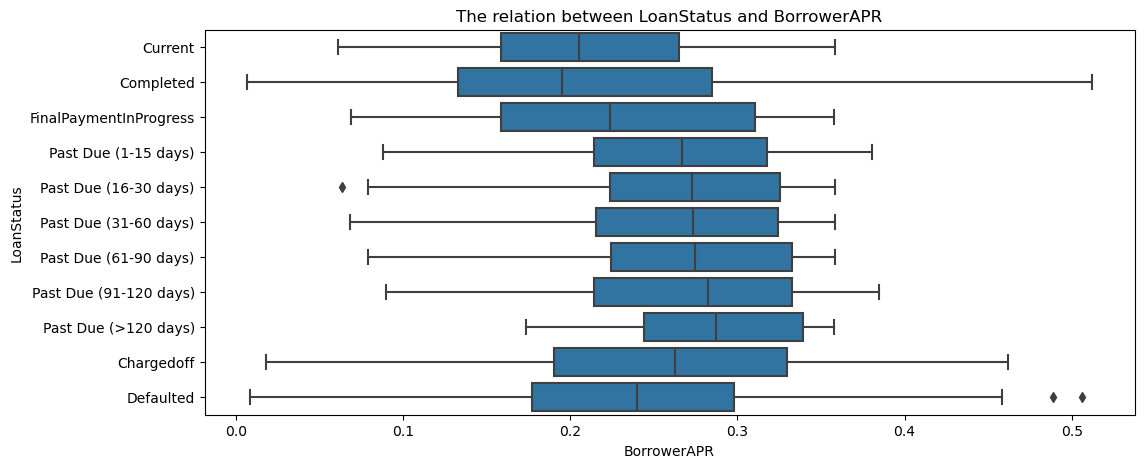

In [5]:
plt.figure(figsize=[12,5])
base_color = sns.color_palette()[0]
order_index = order_status = ['Current', 'Completed', 'FinalPaymentInProgress', 'Past Due (1-15 days)',
               'Past Due (16-30 days)','Past Due (31-60 days)',
               'Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)', 
               'Chargedoff', 'Defaulted']
sns.boxplot(data= df_new ,y='LoanStatus',x='BorrowerAPR',color = base_color,order=order_index)
plt.xlabel('BorrowerAPR')
plt.ylabel('LoanStatus')
plt.title('The relation between LoanStatus and BorrowerAPR');

## Borrower rate Vs EmploymentStatus over time
> From the graph we can see that there is a relationship between the ratings and the term. The better the rating the term. Also in most of the terms it seems that most borrowers preferred long terms where short term borrowed more than those with short term

In [6]:
df_new['EmploymentStatus'] = df_new['EmploymentStatus'].replace(['Employed'],'seasonal');

/var/folders/9s/3_yd7q9j0y33cb8h3dv8psvm0000gn/T/ipykernel_84543/216672694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['EmploymentStatus'] = df_new['EmploymentStatus'].replace(['Employed'],'seasonal');


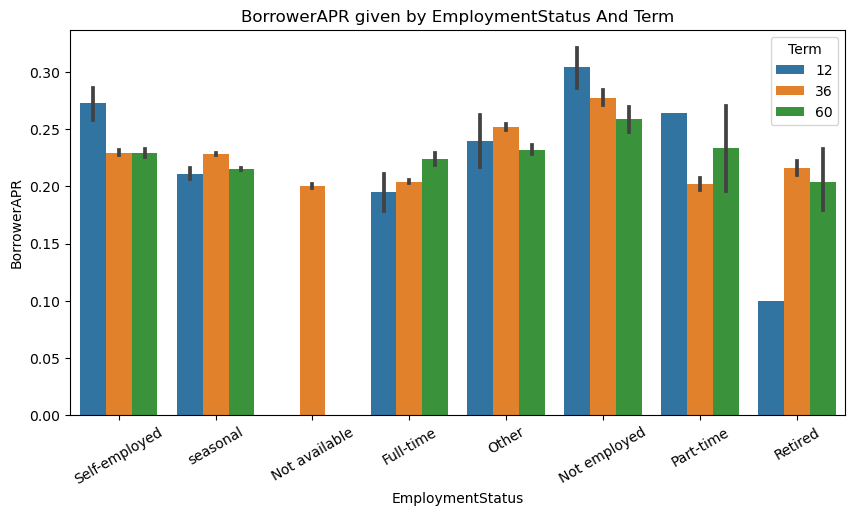

In [7]:
plt.figure(figsize = [10, 5])
sns.barplot(data=df_new, y='BorrowerAPR', x='EmploymentStatus', hue="Term")
plt.xticks(rotation=30)
plt.xlabel('EmploymentStatus')
plt.ylabel('BorrowerAPR')
plt.title('BorrowerAPR given by EmploymentStatus And Term');

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 583491 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
